In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import copy

# モコズキッチンに関連するレシピやつくレポの数の推移を可視化する

In [2]:
year = []
for i in range(1998, 2015):
    year.append(i)

col_names_recipe = ["recipe_id", "dish_name", "detail", "background", "recipe_date"]
col_names_report = ["recipe_id", "message", "reply", "report_date"]

In [3]:
recipe = pd.DataFrame(columns=col_names_recipe)

for i in year:
    recipe_temp = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{i}.csv",
                              names=col_names_recipe, usecols=[0, 2, 3, 6, 7])

    recipe = pd.concat([recipe, recipe_temp])

In [4]:
report = pd.DataFrame(columns=col_names_report)

for i in year:
    report_temp = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/report 2/report{i}.csv",
                              names=col_names_report, usecols=[0, 2, 3, 4])

    report = pd.concat([report, report_temp])

In [64]:
index = pd.read_csv("moko_index.csv")

In [65]:
index.head()

,recipe_id,id_recipe,id_report
0,21709913597ed302ad157efa4f0b3a6db43a9033,21709913597ed302ad157efa4f0b3a6db43a9033,c55e888d8bc32358ac2826e1767f2eeaf54cd6d2
1,5fc6efd568a1f3f2500e14d2bc0de7b4479e188c,5fc6efd568a1f3f2500e14d2bc0de7b4479e188c,f3a5515b6d3b5bc52e5fde16159131f135610c05
2,ae662bdc3ae1c62a4a67f951df2d125496f71c4e,ae662bdc3ae1c62a4a67f951df2d125496f71c4e,104ee9cd0976ce695b7cf5c9bad83a80961ea369
3,5411010461b2f9589e3967bac0b965f1303d4a10,5411010461b2f9589e3967bac0b965f1303d4a10,f131388ba8508e575ad25fe1d6b6b9947b0f6077
4,0100c0203c782850d6a367de1de0a738273d61f3,0100c0203c782850d6a367de1de0a738273d61f3,c0d6cd3678a8cb23a28ef528e7817ccdf577b8c5


In [66]:
id_recipe = index.drop(["recipe_id", "id_report"], axis=1)

In [67]:
id_report = index.drop(["recipe_id", "id_recipe"], axis=1)

In [68]:
index = index.assign(dm_recipe=False, dm_report=False)

In [69]:
length = len(index)
for i in index["id_recipe"]:
    for j in range(length):
        if index["recipe_id"][j] == i:
            index["dm_recipe"][j] = True

In [70]:
length = len(index)
for i in index["id_report"]:
    for j in range(length):
        if index["recipe_id"][j] == i:
            index["dm_report"][j] = True

In [71]:
index.drop(["id_recipe", "id_report"], axis=1, inplace=True)

In [72]:
index.head()

,recipe_id,dm_recipe,dm_report
0,21709913597ed302ad157efa4f0b3a6db43a9033,True,False
1,5fc6efd568a1f3f2500e14d2bc0de7b4479e188c,True,False
2,ae662bdc3ae1c62a4a67f951df2d125496f71c4e,True,False
3,5411010461b2f9589e3967bac0b965f1303d4a10,True,False
4,0100c0203c782850d6a367de1de0a738273d61f3,True,False


In [83]:
id_recipe.rename(columns={'id_recipe': 'recipe_id'}, inplace=True)
id_recipe.dropna(inplace=True)

In [85]:
id_report.rename(columns={'id_report': 'recipe_id'}, inplace=True)
id_report.dropna(inplace=True)

In [86]:
id_report

,recipe_id
0,c55e888d8bc32358ac2826e1767f2eeaf54cd6d2
1,f3a5515b6d3b5bc52e5fde16159131f135610c05
2,104ee9cd0976ce695b7cf5c9bad83a80961ea369
3,f131388ba8508e575ad25fe1d6b6b9947b0f6077
4,c0d6cd3678a8cb23a28ef528e7817ccdf577b8c5
5,c8b98ac650dc4e410f99664dff31859aec2cb232
6,1a064353481b81be2f125d4661b5eb50a70009df
7,7936e8ac277954419b5d108764928655c755c551
8,eb44247e990de0692652c76ceafe4fe0dee11168
9,66de085b70e9d1fe954e76b8023bf2e2c1bbca4b


In [98]:
df_recipe = pd.merge(id_recipe, recipe, on="recipe_id", how="left")

In [88]:
df_report = pd.merge(id_report, report, on="recipe_id", how="left")

In [131]:
df_recipe

,recipe_id,dish_name,detail,background,recipe_date
0,21709913597ed302ad157efa4f0b3a6db43a9033,絶品おくらとネギのさっぱり豚丼,主人が豚丼だと大喜びで帰ってきます 栄養満点で一石二鳥,主人が好きな豚肉料理をパソコンで探していて、 はなまるのもこみちさんレシピが載っていたのを...,2011/05/20
1,5fc6efd568a1f3f2500e14d2bc0de7b4479e188c,海老ガーリックのバルサミコソース,つまみにもおかずにも丁度いい 食べやすいカロリーU・x・U,moco'sキッチンで もこみちが作ってたのを参考に 作ってみました( ´ ▽ ` )ﾉ,2011/06/04
2,ae662bdc3ae1c62a4a67f951df2d125496f71c4e,*ポテトのベーコンdeホットサラダ*,これまた簡単。 手抜き過ぎてどうしましょう。 白飯のお供にもなったりしますよ( '艸｀*) ...,新じゃがはたくさんあるし。。。 どーしようかなぁ～と 4月からあたためていた？下書きレシピ...,2011/07/14
3,5411010461b2f9589e3967bac0b965f1303d4a10,キノコのクリーム ごはんかけ,本日はエビですがTVでは鶏肉で作ってましたね～,TVでもこみちさんのお料理がおいしそうだったので真似してみましたがすっかりM流になってしまいました,2011/10/21
4,0100c0203c782850d6a367de1de0a738273d61f3,タコライス（もどきかな？）,美味いっす❤,達也・川越までとわいわない、せめてもこみちと同じくらいに上達したい思いでつくってみた。,2011/12/06
...,...,...,...,...,...
89,b39a88b04c20fbbee66058ebde7fcf7829025b1d,たらことトマトの冷たいパスタ♡,たらことトマトって 合う〜d(^_^o),Moco'sキッチンを観た後で冷蔵庫と相談して自己流にd(^_^o),2014/08/05
90,87d7f7940df6faa1b310cfbf6084540c58093dc1,プリプリ海老＆椎茸✿カリカリチーズ焼き,海老とチーズと椎茸の相性抜群！仕上げのポン酢で味が引き締まります♬,普段はマヨネーズで作ります。 もこみち君の料理番組でのオリーブオイル使いが凄すぎて、「もこみ...,2014/08/07
91,4d2b7412a066635c3e213a79434e13a6a30e80aa,麦ご飯のえびチーズリゾット♪,あえてバターをいれず、さっぱり。 コンソメを2種類使ったら、深い味になりました。,モコズキッチンを参考に作りましたが、まったく別の料理になりました。 これはこれで、美味しかっ...,2014/08/20
92,228cf17e022001626cd9a7256c10bf639f10215a,ご飯もお酒もすすむ 野菜の味噌豆板醤炒め,おうちにあるお野菜ですぐにできちゃう一品です。ご飯のお供にもビールにもばっちし合います。,モコズキッチンで見た豆板醤と味噌を使ったレシピが美味しそうだったので、豆板醤と味噌ベースの炒...,2014/09/01


In [99]:
recipe_date = pd.to_datetime(df_recipe['recipe_date'])

In [109]:
recipe_date

0    2011-05-20
1    2011-06-04
2    2011-07-14
3    2011-10-21
4    2011-12-06
        ...    
89   2014-08-05
90   2014-08-07
91   2014-08-20
92   2014-09-01
93   2014-09-09
Name: recipe_date, Length: 94, dtype: datetime64[ns]

In [113]:
transition_list = [0 for i in range(45)]
for i in range(len(recipe_date)):
    transition_list[(recipe_date[i].year - 2011) * 12 + recipe_date[i].month - 1] += 1

In [116]:
import datetime

In [124]:
x_time = []
for i in range(45):
    y = i // 12
    m = (i+1) % 12
    if m == 0:
        m = 12
    d = datetime.datetime(y+2011, m, 1)
    x_time.append(d)

Text(0, 0.5, 'recipe qty')

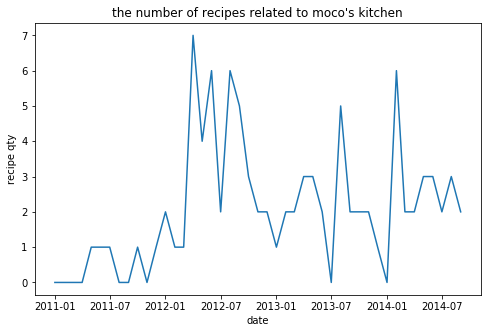

In [130]:
fig = plt.figure(figsize=(8.0, 5.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_time, transition_list)
ax.set_title("the number of recipes related to moco's kitchen")
ax.set_xlabel("date")
ax.set_ylabel("recipe qty")

In [49]:
df = pd.merge(index, recipe, on="recipe_id", how="left")

In [50]:
df = pd.merge(df, report, on="recipe_id", how="left")

In [51]:
df.head()

,recipe_id,dm_recipe,dm_report,dish_name,detail,background,recipe_date,message,reply,report_date
0,21709913597ed302ad157efa4f0b3a6db43a9033,True,False,絶品おくらとネギのさっぱり豚丼,主人が豚丼だと大喜びで帰ってきます 栄養満点で一石二鳥,主人が好きな豚肉料理をパソコンで探していて、 はなまるのもこみちさんレシピが載っていたのを...,2011/05/20,NaN,NaN,NaN
1,5fc6efd568a1f3f2500e14d2bc0de7b4479e188c,True,False,海老ガーリックのバルサミコソース,つまみにもおかずにも丁度いい 食べやすいカロリーU・x・U,moco'sキッチンで もこみちが作ってたのを参考に 作ってみました( ´ ▽ ` )ﾉ,2011/06/04,NaN,NaN,NaN
2,ae662bdc3ae1c62a4a67f951df2d125496f71c4e,True,False,*ポテトのベーコンdeホットサラダ*,これまた簡単。 手抜き過ぎてどうしましょう。 白飯のお供にもなったりしますよ( '艸｀*) ...,新じゃがはたくさんあるし。。。 どーしようかなぁ～と 4月からあたためていた？下書きレシピ...,2011/07/14,"""旨②～！リピ確定✧いにゃこ©野会みんなお留守でさみしいゾー。。。""","""ひゃっほ♪１番つくれぽ大感謝♡嬉しいじょ♪何時でもリピして～""",2011/07/15
3,ae662bdc3ae1c62a4a67f951df2d125496f71c4e,True,False,*ポテトのベーコンdeホットサラダ*,これまた簡単。 手抜き過ぎてどうしましょう。 白飯のお供にもなったりしますよ( '艸｀*) ...,新じゃがはたくさんあるし。。。 どーしようかなぁ～と 4月からあたためていた？下書きレシピ...,2011/07/14,"""簡単でウマウマ♪甘酢+ゴマ油でコクたっぷり美味しかった。夫も絶賛""","""わお☆早速の活躍ぅ～♡有難う♪感激よぉ♪(T-T) ｳﾙｳﾙ""",2011/07/19
4,ae662bdc3ae1c62a4a67f951df2d125496f71c4e,True,False,*ポテトのベーコンdeホットサラダ*,これまた簡単。 手抜き過ぎてどうしましょう。 白飯のお供にもなったりしますよ( '艸｀*) ...,新じゃがはたくさんあるし。。。 どーしようかなぁ～と 4月からあたためていた？下書きレシピ...,2011/07/14,"""息子のB・Dぱーちーに♪大好評♡エアコン祝♡""","""にゃんと!テレるわ♡えっちゃんとあやちんに宜しく♪（ばぅ） """,2011/07/21


In [52]:
len(df)

17330